In [177]:
from matplotlib import pyplot as plt



# Q4

In [210]:
def neuron (x:tuple,y:tuple,z:tuple,I: float):
       
    xt = y - 1*x**3 + 3*x**2 + I - z
    yt = 1 - 5*x**2 - y
    zt = 0.001*(4*(x-(-1.6))-z)
    
    return (xt,yt,zt)

In [211]:
def rk4 (x:float, y: float, z: float, Ic: float, n: int,  dt: float,i_i,i_f):
    for i in range (n):
        if (i_i<i):
            if (i<i_f):
                I = Ic
        else:
            I = 0
        (xa,ya,za) = neuron(x,y,z,I)
        (xb,yb,zb) = neuron(x+dt*0.5*xa,y+dt*0.5*ya,z+dt*0.5*za,I)
        (xc,yc,zc) = neuron(x+dt*0.5*xb,y+dt*0.5*yb,z+dt*0.5*zb,I)
        (xd,yd,zd) = neuron(x+dt*xc,y+dt*yc,z+dt*zc,I)
        x = x + dt/6*(xa + 2*xb + 2*xc + xd)
        y = y + dt/6*(ya + 2*yb + 2*yc + yd)
        z = z + dt/6*(za + 2*zb + 2*zc + zd)
        yield (x,y,z)

#dt = tamanho do passo de integração
#n = número de pontos (x,y,z) que são calculados

In [215]:
def plot2(I,n,n_inic,dt,i_i,i_f,ni):
    
    plt.figure(figsize=(15, 5))
   
    x0 = -1.6
    y0 = -12
    z0 = 0
    (X,Y,Z) = zip(*rk4(x0,y0,z0,I,n,dt,i_i,i_f))
    t = [i for i in range(len(X[n_inic:]))]
    
    plt.plot(t, X[n_inic:], 'k-')
    
    vertical_line = [-2.5 + i*0.1 for i in range(1,50)]
    plot_i_i = [i_i - n_inic for i in range(len(vertical_line))]
    plot_i_f = [i_f - n_inic for i in range(len(vertical_line))]
    
    plt.plot(plot_i_i,vertical_line,'r-')
    plt.plot(plot_i_f,vertical_line,'r-')
    
    plt.xlabel('t')
    plt.ylabel('V')
    plt.ylim(-2.5,2)
    plt.xlim(ni,n)
    plt.title('Fig 6, I = %.1f' %I)
    plt.show()
    
    return

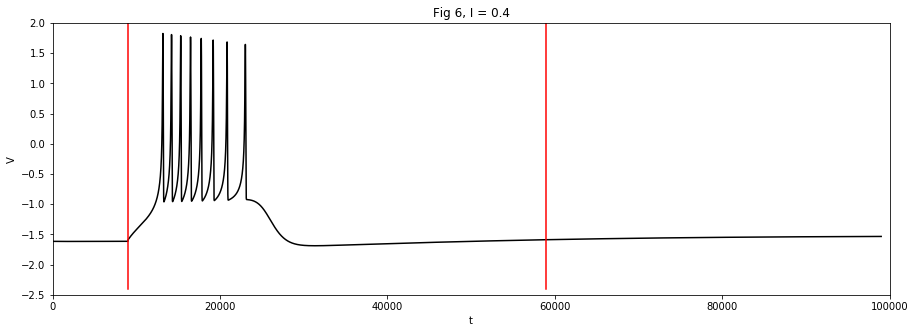

In [213]:
I=0.4 #0.4, 2, 4
n = 100000 #number of time points for simulation
dt = 0.01 #interval between points for numerical calculus
n_inic = 1000 # number of points that are disconsidered for the plot
ni = 0
i_i = 10000 
i_f = 60000
plot2(I,n,n_inic,dt,i_i,i_f,ni)

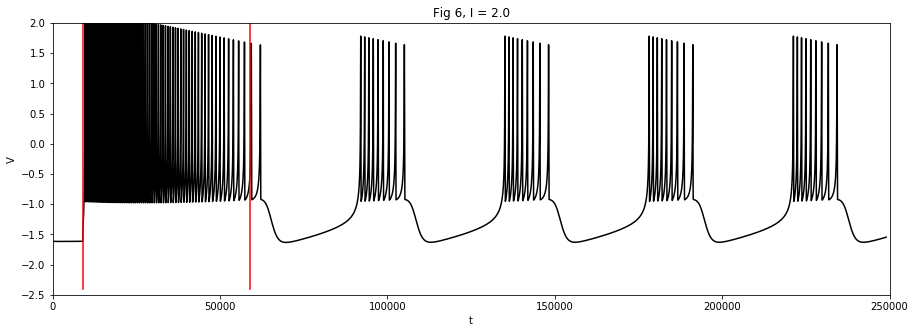

In [221]:
I=2 #0.4, 2, 4
n = 250000 #number of time points for simulation
dt = 0.01 #interval between points for numerical calculus
n_inic = 1000 # number of points that are disconsidered for the plot
ni = 0
i_i = 10000 
i_f = 60000
plot2(I,n,n_inic,dt,i_i,i_f,ni)

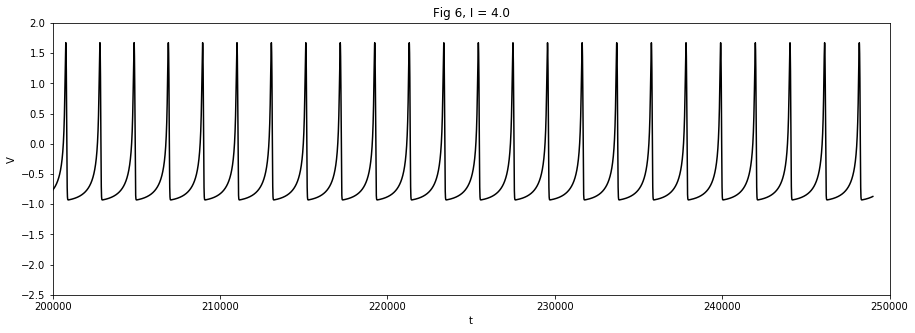

In [217]:
I=4 #0.4, 2, 4
n = 250000 #number of time points for simulation
dt = 0.01 #interval between points for numerical calculus
n_inic = 1000 # number of points that are disconsidered for the plot
ni = 200000
i_i = 10000 
i_f = 60000
plot2(I,n,n_inic,dt,i_i,i_f,ni)